# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv("/content/porter_data_1.csv")

In [3]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [6]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
duplicate_df = df.copy()
duplicate_df['created_at'] = pd.to_datetime(duplicate_df['created_at'], errors='coerce')
duplicate_df['actual_delivery_time'] = pd.to_datetime(duplicate_df['actual_delivery_time'], errors='coerce')
# errors ='coerce' means "If you can't convert a value, just turn it into NaN (Not a Number) and don't stop

In [7]:
duplicate_df[['created_at', 'actual_delivery_time']]

created_at actual_delivery_time
0      2015-02-06 22:24:17  2015-02-06 23:11:17
1      2015-02-10 21:49:25  2015-02-10 22:33:25
2      2015-02-16 00:11:35  2015-02-16 01:06:35
3      2015-02-12 03:36:46  2015-02-12 04:35:46
4      2015-01-27 02:12:36  2015-01-27 02:58:36
...                    ...                  ...
175772 2015-02-17 00:19:41  2015-02-17 01:02:41
175773 2015-02-13 00:01:59  2015-02-13 01:03:59
175774 2015-01-24 04:46:08  2015-01-24 05:32:08
175775 2015-02-01 18:18:15  2015-02-01 19:03:15
175776 2015-02-08 19:24:33  2015-02-08 20:01:33

[175777 rows x 2 columns]

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [8]:
# Convert categorical features to category type
duplicate_df['market_id'] = duplicate_df['market_id'].astype('category')
duplicate_df['store_primary_category'] = duplicate_df['store_primary_category'].astype('category')

In [9]:
duplicate_df[['market_id', 'store_primary_category']]

market_id store_primary_category
0            1.0                      4
1            2.0                     46
2            2.0                     36
3            1.0                     38
4            1.0                     38
...          ...                    ...
175772       1.0                     28
175773       1.0                     28
175774       1.0                     28
175775       1.0                     58
175776       1.0                     58

[175777 rows x 2 columns]

In [10]:
duplicate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

In [ ]:
# FEATURE ENGINEERING :
# =========================================================================================================
# Feature Engineering is the "kitchen prep" for your data.
# It's the process of selecting, transforming, and creating features (your data columns or "ingredients")
# so that a model like Linear Regression can "cut" through them effectively to find patterns.

# Feature Engineering in Linear Regression is the process of creating and modifying input features to better
# fit the strict, mathematical assumptions of the linear model.

# Feature Engineering is what makes Linear Regression a flexible and powerful tool.
# Without it, Linear Regression is a rigid model that fails on complex, real-world data.

# Properties of Feature Engineering :
# ===================================
# 1) It model's Non-Linear Relationships.

# 2) Conversion of Categorical data --> As model's can't understand text language like 'USA', 'India', etc.
#                                   --> We need to convert them into understandable language.
# Note : Technique used to in "Conversion of Categorical data" is ' "One-Hot-Encoding" '

# Original Data:
# | Salary | Country |
# |---------|---------|
# | 70k | USA |
# | 60k | Europe |
# | 75k | USA |

# With Feature Engineering (One-Hot Encoding):
# | Salary | Country_USA | Country_Europe |
# |---------|-------------|----------------|
# | 70k | 1 | 0 |
# | 60k | 0 | 1 |
# | 75k | 1 | 0 |

# 3) Capture Interaction Effects --> Linear Regression assumes the effect of one feature is independent of others.
#                                --> But often, features work together. For example, the impact of advertising on sales
#                                --> might be much higher if it's also a holiday.
#                                --> We create a feature with "Is_Holiday" (0/1 feature)

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [11]:
# Calculate time taken in minutes
duplicate_df['time_taken_to_deliver'] = (duplicate_df['actual_delivery_time'] - duplicate_df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [12]:
# Extract the hour and day of week from the 'created_at' timestamp
duplicate_df['ordered_day'] = duplicate_df['created_at'].dt.day_name()
duplicate_df['ordered_hour'] = duplicate_df['created_at'].dt.hour

# Create a categorical feature 'isWeekend'
duplicate_df['isWeekend'] = duplicate_df['ordered_day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)


In [13]:
duplicate_df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_to_deliver ordered_day  \
0                      21.0     34.44                   47.0      Friday   
1                       2.0     27.60                   44.0     Tuesday   
2                      18.0     11.56                   55.0      Monday   
3                       8.0     31.80                   59.0    Thursday   
4                       7.0      8.20                   46.0     Tuesday   

   ordered_hour  isWeekend  
0            22          0  
1            21          0  
2             0          0  
3             3          0  
4             2          0

In [14]:
# Drop unnecessary columns
# As 'ordered_day' and 'ordered_hour' is extracted from "created_at" and "actual_delivery_time" columns we don't require them any more.
columns_to_drop = ['created_at', 'actual_delivery_time']
duplicate_df.drop(columns = columns_to_drop, inplace = True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [15]:
duplicate_df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_to_deliver',
       'ordered_day', 'ordered_hour', 'isWeekend'],
      dtype='object')

In [16]:
# Define target variable (y) and features (X)
X = duplicate_df[['market_id',
             'store_primary_category', 'order_protocol',
             'total_items', 'subtotal', 'num_distinct_items',
             'min_item_price', 'max_item_price',
             'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
             'distance', 'ordered_day', 'ordered_hour' ]]
y = duplicate_df['time_taken_to_deliver']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [18]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [19]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(include=['category']).columns

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

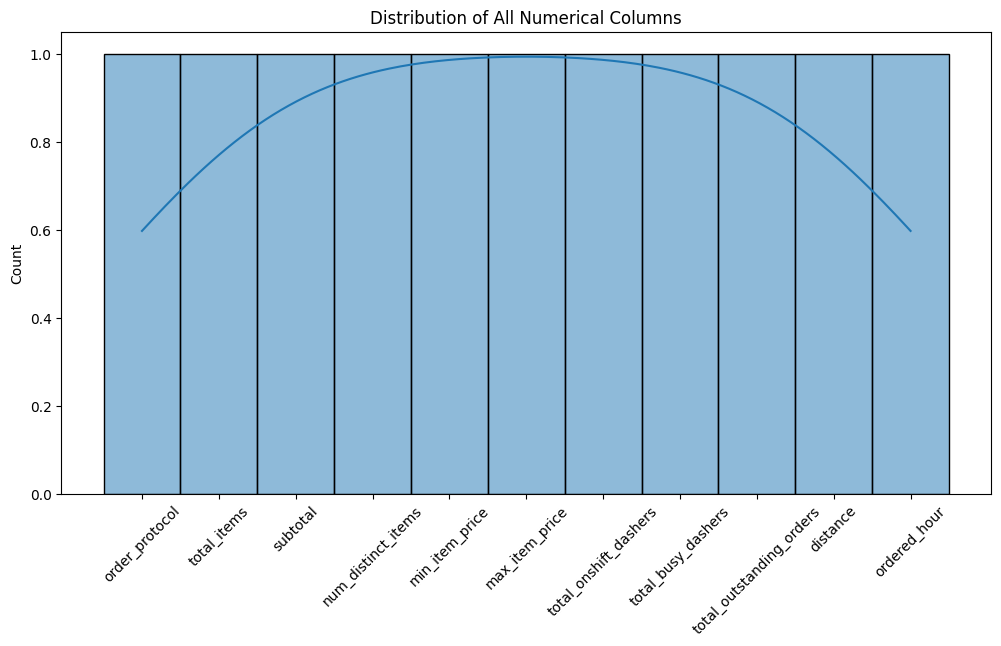

In [23]:
# Plot distributions for all numerical columns [histplot]
plt.figure(figsize=(12, 6))
sns.histplot(data = numerical_columns, kde=True)
plt.title("Distribution of All Numerical Columns")
plt.xticks(rotation=45)
plt.show()
# Insight : Minimum item price and Maximum item price column values count is more than any other columns.
# Insight : "order_protocol" and "ordered_hour" columns has lowest count amoung other columns.

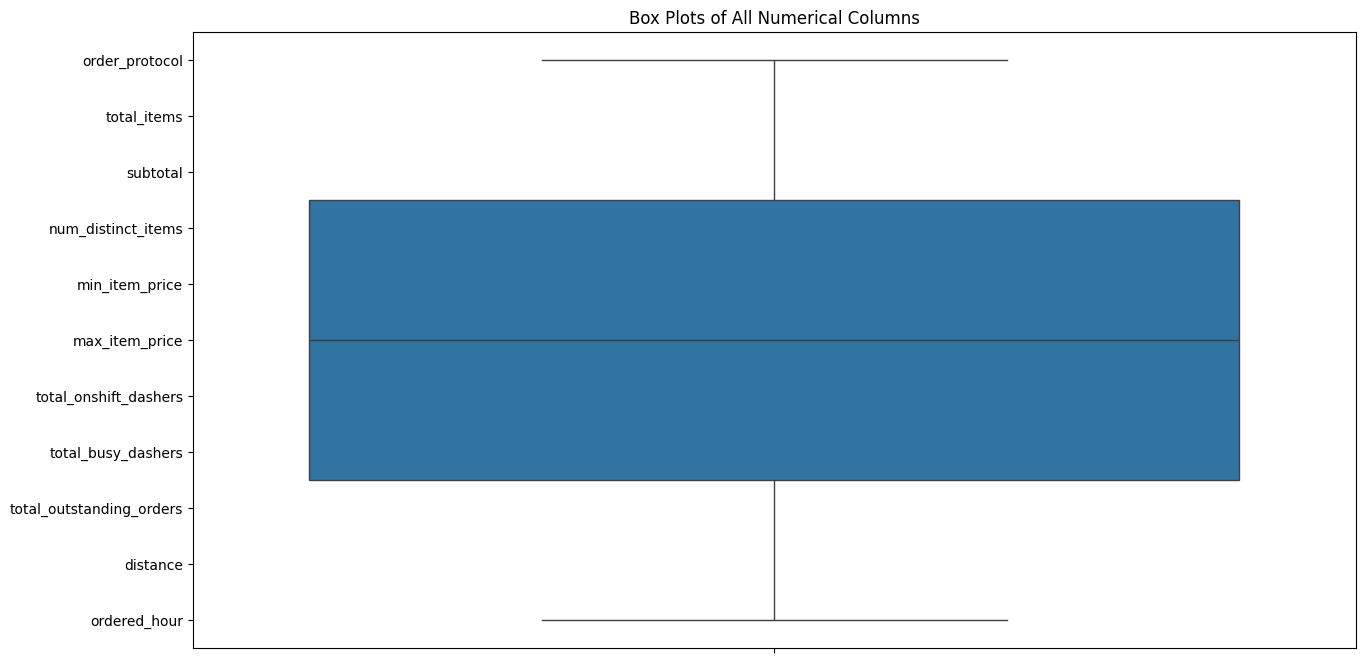

In [24]:
# Plot distributions for all numerical columns using [barplot]
plt.figure(figsize=(15, 8))
sns.boxplot(data = numerical_columns)
plt.title("Box Plots of All Numerical Columns")
plt.xticks(rotation=45)
plt.show()
# Insight : Same as above graph but the difference is that this cell visualization is boxplot which is different from histplot.

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

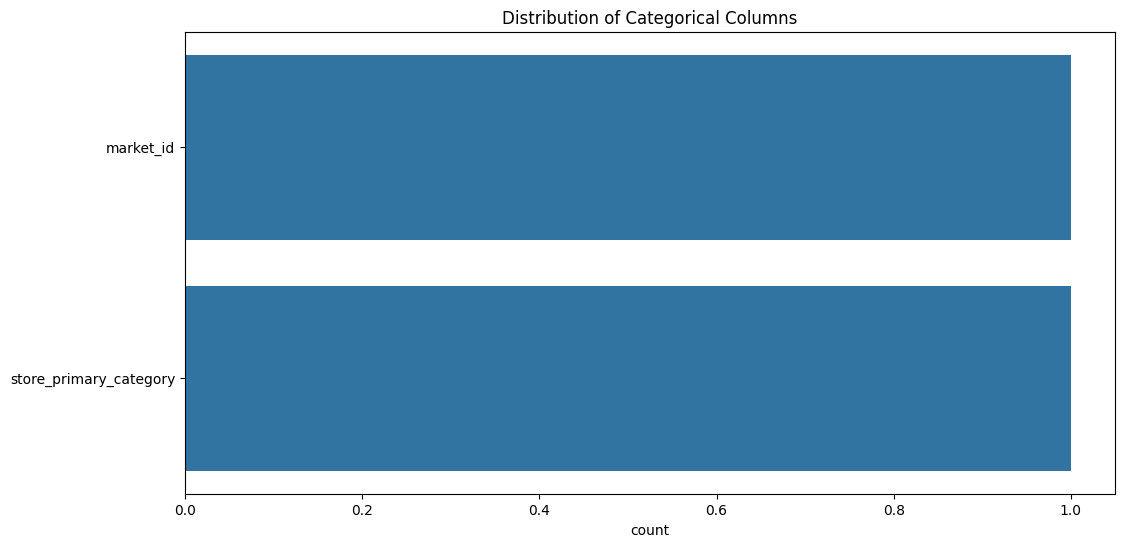

In [25]:
# Distribution of categorical columns
plt.figure(figsize=(12, 6))
sns.countplot(data = categorical_columns)
plt.title("Distribution of Categorical Columns")
plt.show()
# Insight : Both categorical columns i.e 'market_id' and 'store _primary_category' have equal count
#           which means Distribution of Categorical columns were equally distributed.

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

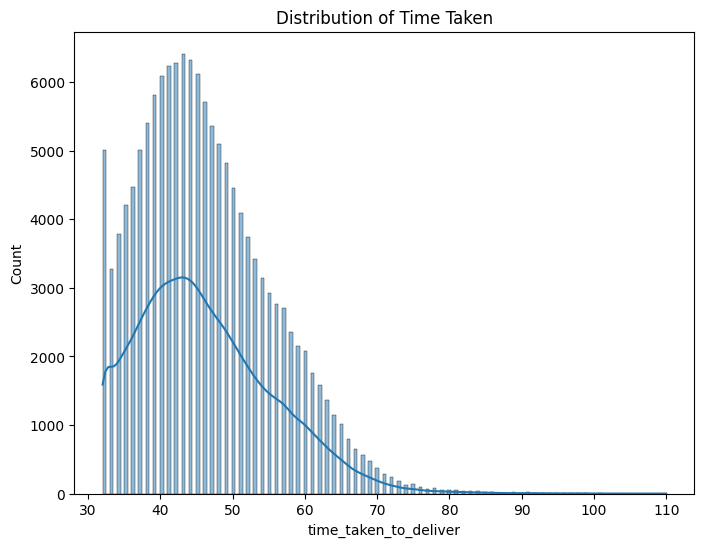

In [26]:
# Distribution of time_taken [histplot]
plt.figure(figsize=(8, 6))
sns.histplot(data = y_train, kde=True) # KDE --> Kernel Density Function is a line or a curve which determines pattern for visualization
plt.title("Distribution of Time Taken")
plt.show()
# Insight : Time taken to deliver has a quite normal distribution from 30 to 50.
# Insight : But from 50 graph distribution is unusual as it's decreasing from there and improvement to increase.

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

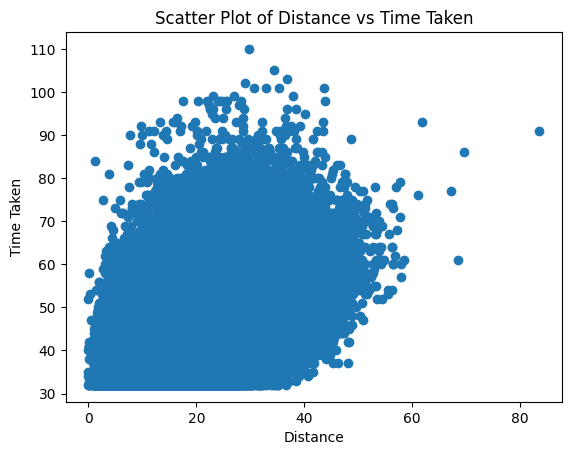

In [27]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.scatter(X_train['distance'], y_train)
plt.xlabel('Distance')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of Distance vs Time Taken')
plt.show()
# Insight 1 : In general as distance increases time taken to travel will also increase.
# Insight 2 : But in some circumstances if there is any huge traffic jam in short distance even then time takes more to travel.
# Insight 3 : Insight 2 occurred in below scatterplot visualization.
# Insight 4 : There is some linear relationship between Time taken and Distance.

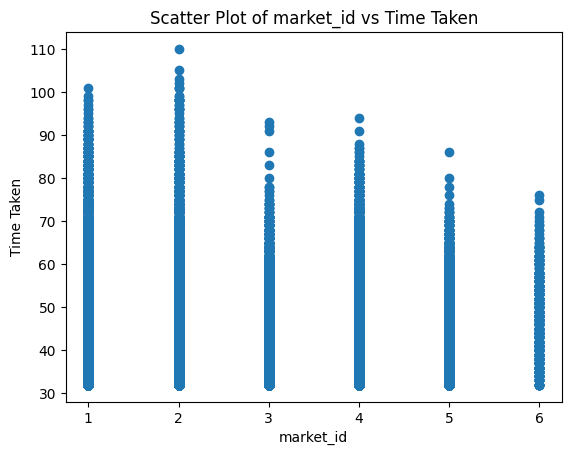

In [28]:
plt.scatter(X_train['market_id'], y_train)
plt.xlabel('market_id')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of market_id vs Time Taken')
plt.show()
# Insight : Market id 2 took much time to get popular. This might be because this market id is located in outskirts of city.
# Insight : Market id 6 became famous in less time which means it can be situated near to most of the population
#           and quality of product is good.

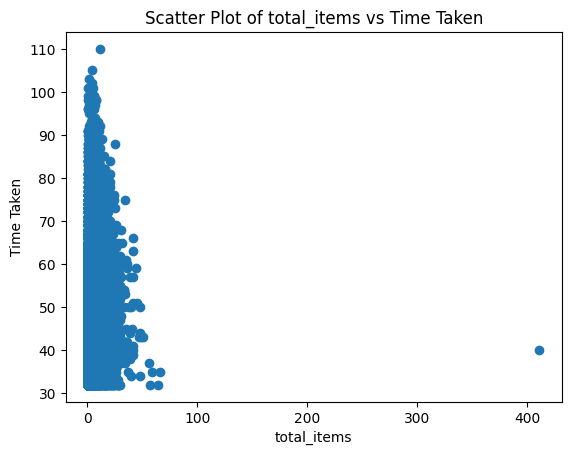

In [29]:
plt.scatter(X_train['total_items'], y_train)
plt.xlabel('total_items')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of total_items vs Time Taken')
plt.show()
# Insight 1 : Total items taken lies between 0 to 50 only.
# Insight 2 : There is an outlier where someone took 400 total number of items.

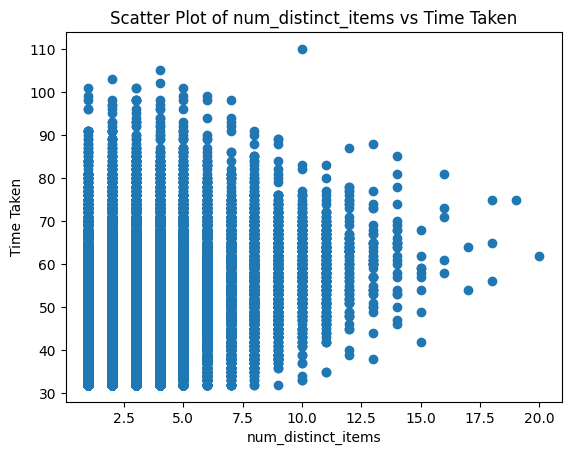

In [30]:
plt.scatter(X_train['num_distinct_items'], y_train)
plt.xlabel('num_distinct_items')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of num_distinct_items vs Time Taken')
plt.show()

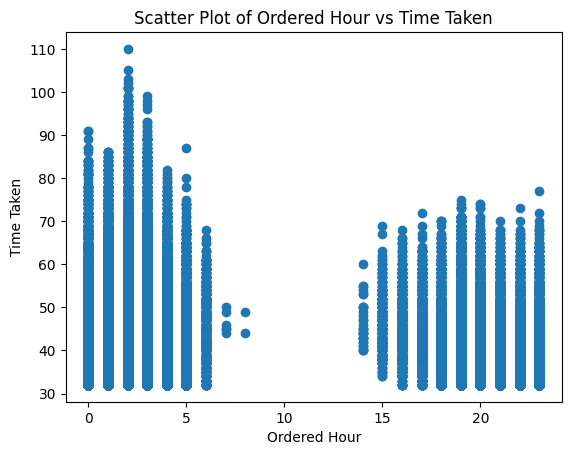

In [31]:
# Show the distribution of time_taken for different hours
plt.scatter(X_train['ordered_hour'], y_train)
plt.xlabel('Ordered Hour')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of Ordered Hour vs Time Taken')
plt.show()
# Insight : Busy hours include 0 to 5 and 15 to 23 hours.

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [32]:
# Plot the heatmap of the correlation matrix
correlation_matrix = duplicate_df[['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
                         'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers',
                         'total_busy_dashers', 'total_outstanding_orders', 'distance',
                         'ordered_hour', 'isWeekend', 'time_taken_to_deliver']].corr()
correlation_matrix

market_id  store_primary_category  order_protocol  \
market_id                  1.000000                0.031733       -0.013340   
store_primary_category     0.031733                1.000000        0.088281   
order_protocol            -0.013340                0.088281        1.000000   
total_items                0.003567               -0.005624        0.007305   
subtotal                  -0.000724                0.040734       -0.051889   
num_distinct_items         0.015506                0.001571       -0.023943   
min_item_price            -0.010939                0.016063       -0.043845   
max_item_price            -0.007260                0.006189       -0.090518   
total_onshift_dashers      0.074289                0.082501        0.147408   
total_busy_dashers         0.065351                0.083274        0.152001   
total_outstanding_orders   0.068223                0.081696        0.136881   
distance                   0.019141                0.000712       -0.009994   
ordered_hour              -0.008421               -0.034029        0.012601   
isWeekend                 -0.000558               -0.017038       -0.000568   
time_taken_to_deliver     -0.073016                0.026973       -0.136755   

                          total_items  subtotal  num_distinct_items  \
market_id                    0.003567 -0.000724            0.015506   
store_primary_category      -0.005624  0.040734            0.001571   
order_protocol               0.007305 -0.051889           -0.023943   
total_items                  1.000000  0.554951            0.758339   
subtotal                     0.554951  1.000000            0.680842   
num_distinct_items           0.758339  0.680842            1.000000   
min_item_price              -0.389471  0.038778           -0.446503   
max_item_price              -0.053749  0.509787            0.047113   
total_onshift_dashers        0.032087  0.131239            0.065793   
total_busy_dashers           0.029084  0.126150            0.060508   
total_outstanding_orders     0.034818  0.130481            0.067730   
distance                     0.006589  0.038156            0.024535   
ordered_hour                -0.070399 -0.190739           -0.118982   
isWeekend                    0.029398  0.048313            0.044081   
time_taken_to_deliver        0.224856  0.413267            0.312055   

                          min_item_price  max_item_price  \
market_id                      -0.010939       -0.007260   
store_primary_category          0.016063        0.006189   
order_protocol                 -0.043845       -0.090518   
total_items                    -0.389471       -0.053749   
subtotal                        0.038778        0.509787   
num_distinct_items             -0.446503        0.047113   
min_item_price                  1.000000        0.541522   
max_item_price                  0.541522        1.000000   
total_onshift_dashers           0.042655        0.133786   
total_busy_dashers              0.044311        0.131835   
total_outstanding_orders        0.041478        0.131364   
distance                        0.004464        0.029366   
ordered_hour                   -0.051824       -0.189802   
isWeekend                       0.000760        0.045523   
time_taken_to_deliver           0.022753        0.255167   

                          total_onshift_dashers  total_busy_dashers  \
market_id                              0.074289            0.065351   
store_primary_category                 0.082501            0.083274   
order_protocol                         0.147408            0.152001   
total_items                            0.032087            0.029084   
subtotal                               0.131239            0.126150   
num_distinct_items                     0.065793            0.060508   
min_item_price                         0.042655            0.044311   
max_item_price                         0.133786            0.131835   
total_onshift_dashers   

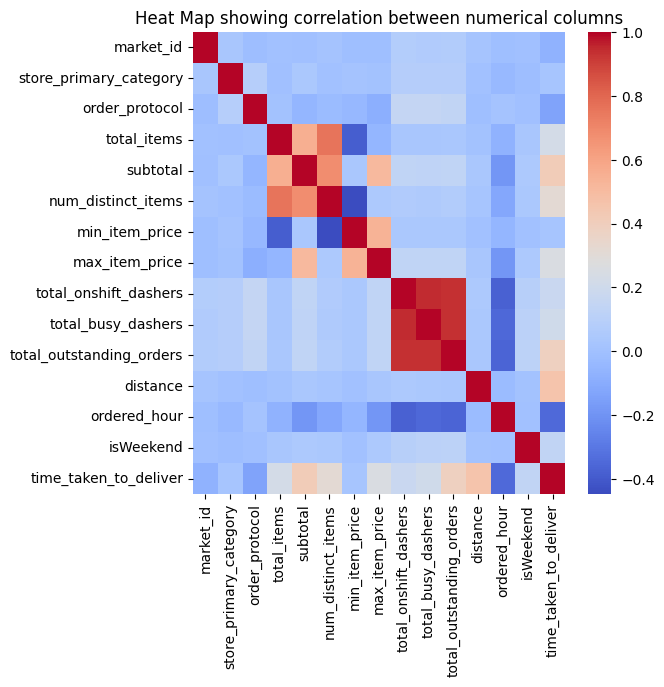

In [35]:
plt.figure(figsize = (6, 6))
sns.heatmap(data = correlation_matrix, cmap = 'coolwarm')
plt.title('Heat Map showing correlation between numerical columns')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [36]:
correlation_with_target = duplicate_df.corr(numeric_only=True)['time_taken_to_deliver'].abs()

# Define a threshold below which features are considered weakly correlated
threshold = 0.1
weak_corr = correlation_with_target[correlation_with_target < threshold]

# Now inspect what will be dropped
print("Columns to drop due to weak correlation:")
print(weak_corr.index.tolist())

Columns to drop due to weak correlation:
['min_item_price']


In [37]:
# Drop weakly correlated columns from training dataset
# From above heatmap diagram it can be visualized that "min_item_price"
# does not have much relation with target variable.
duplicate_df.drop(["min_item_price"], axis=1, inplace=True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

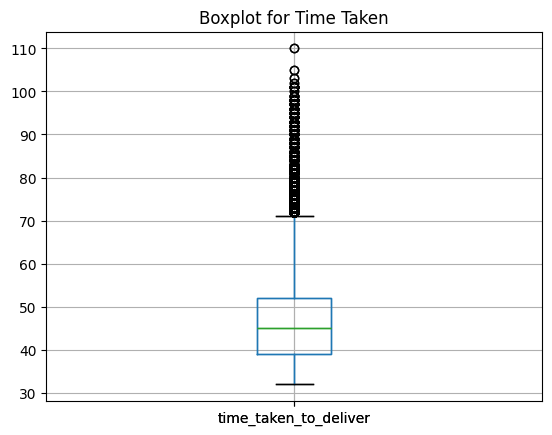

In [38]:
duplicate_df.boxplot(column = 'time_taken_to_deliver')
duplicate_df.boxplot(column = 'time_taken_to_deliver')
plt.title('Boxplot for Time Taken')
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [41]:
# Handle outliers
from scipy import stats

# Select only numerical columns for z-score calculation
numerical_cols_for_outlier = duplicate_df.select_dtypes(include=[np.number]).columns

# Apply z-score to numerical columns and filter rows based on z-score threshold
dataset = duplicate_df[(np.abs(stats.zscore(duplicate_df[numerical_cols_for_outlier])) < 3).all(axis=1)]

In [ ]:
# z-score threshold :
# =============================
# The primary goal of this is to remove outliers from the dataset.
# It identifies rows that contain extreme values in any of their numerical columns and creates a new DataFrame (dataset)
# that excludes these outlier rows.
# ============================
# A Z-score measures how many standard deviations a data point is away from the mean of its column.
# Z-score of 0: The data point is exactly the mean.
# Z-score of +2: The data point is 2 standard deviations above the mean.
# Z-score of -1.5: The data point is 1.5 standard deviations below the mean.
# The general rule of thumb is that any data point with a Z-score greater than 3 or less than -3 is considered an outlier.
# This is because, in a normal distribution, 99.7% of all data points lie within 3 standard deviations of the mean.
# Anything outside this range is statistically rare and likely an anomaly.

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [42]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(include=['category']).columns

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

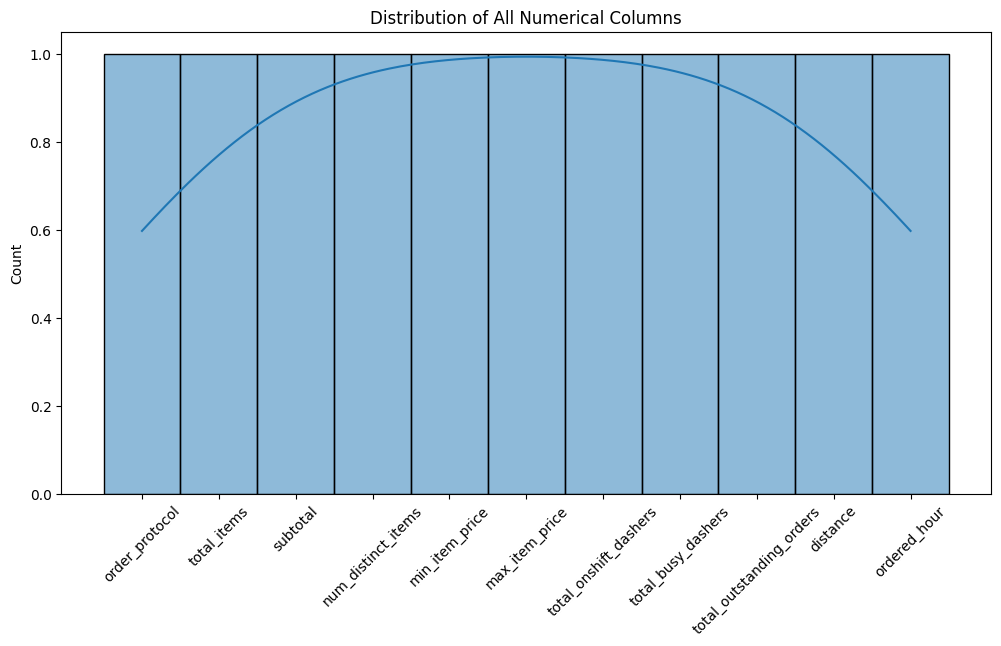

In [43]:
# Plot distributions for all numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(data = numerical_columns, kde=True)
plt.title("Distribution of All Numerical Columns")
plt.xticks(rotation=45)
plt.show()

##### **4.1.2**
Check the distribution of categorical features

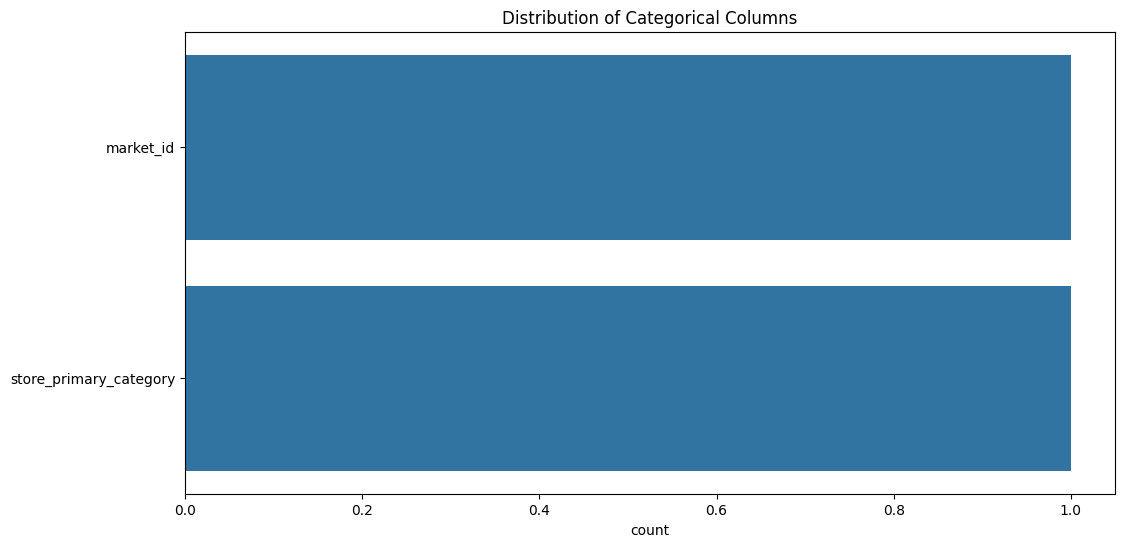

In [44]:
# Distribution of categorical columns
plt.figure(figsize=(12, 6))
sns.countplot(data = categorical_columns)
plt.title("Distribution of Categorical Columns")
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

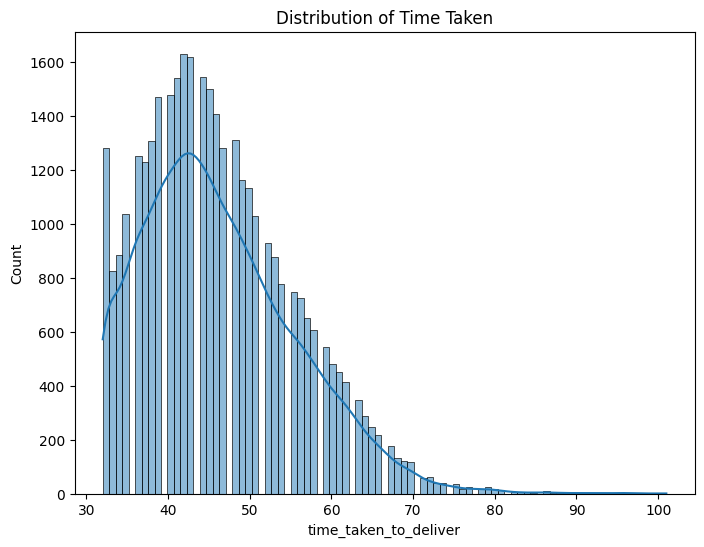

In [45]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(data = y_test, kde=True)
plt.title("Distribution of Time Taken")
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

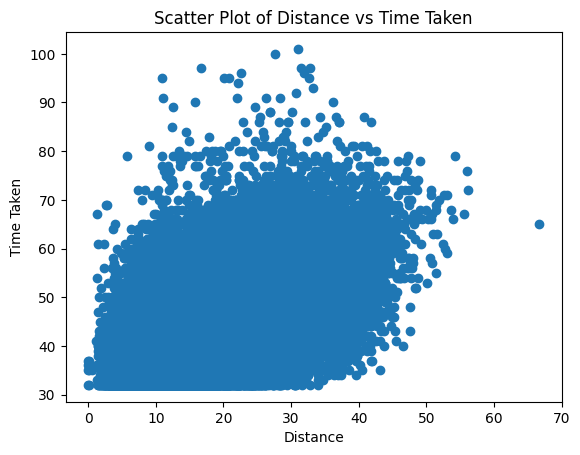

In [46]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.scatter(X_test['distance'], y_test)
plt.xlabel('Distance')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of Distance vs Time Taken')
plt.show()


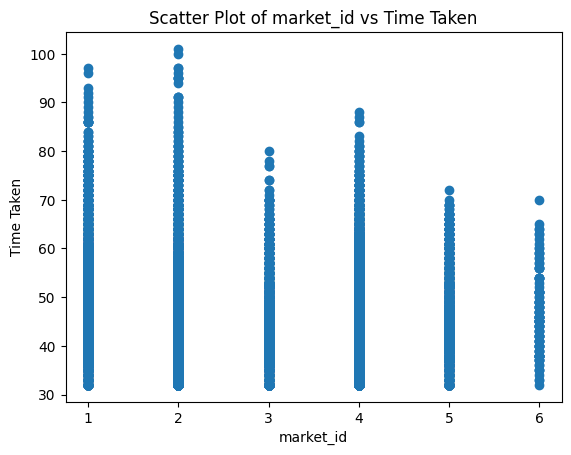

In [ ]:
plt.scatter(X_test['market_id'], y_test)
plt.xlabel('market_id')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of market_id vs Time Taken')
plt.show()

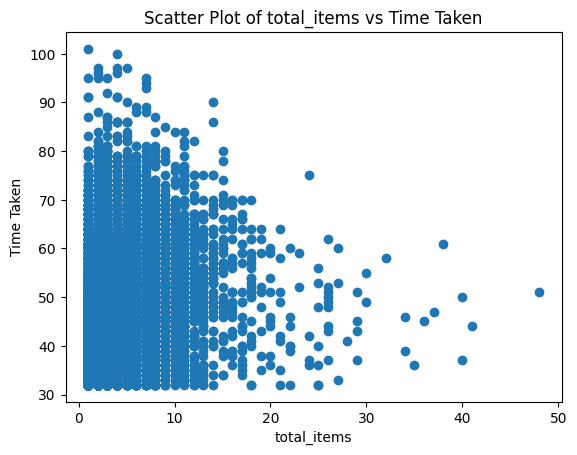

In [ ]:
plt.scatter(X_test['total_items'], y_test)
plt.xlabel('total_items')
plt.ylabel('Time Taken')
plt.title('Scatter Plot of total_items vs Time Taken')
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset
# Weakly correlated columns were already dropped earlier.
# No additional columns need to be removed at this stage.

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [47]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [48]:
# Apply scaling to the numerical columns
# It's the process of transforming all your numerical features to be on a similar, common scale.

# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for scaling
numerical_cols_to_scale = dataset.select_dtypes(include=[np.number]).columns.tolist()

# Remove the target variable 'time_taken_to_deliver' from the list of columns to scale
# This is important as we usually don't scale the target variable
if 'time_taken_to_deliver' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('time_taken_to_deliver')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical columns in the training data
dataset[numerical_cols_to_scale] = scaler.fit_transform(dataset[numerical_cols_to_scale])

<ipython-input-48-a0b7a9025ff8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[numerical_cols_to_scale] = scaler.fit_transform(dataset[numerical_cols_to_scale])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
### Model-1 [scikit-learn]

In [49]:
# Create/Initialise the model
# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression
model_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [50]:
# Train the model using the training data
model_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['order_protocol',
                                                   'total_items', 'subtotal',
                                                   'num_distinct_items',
                                                   'min_item_price',
                                                   'max_item_price',
                                                   'total_onshift_dashers',
                                                   'total_busy_dashers',
                                                   'total_outstanding_orders',
                                                   'distance',
                                                   'ordered_hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['market_id',
                                                   'store_primary_category',
                                                   'ordered_day'])])),
                ('regressor', LinearRegression())])

In [52]:
# Make predictions
y_pred = model_1.predict(X_test)

In [53]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

MAE: 1.92
RMSE: 2.78
R² Score: 0.91


In [ ]:
### Model-2 [stats]

In [54]:
# Required libraries
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Define categorical and numerical columns
categorical_cols_sm = ['store_primary_category', 'ordered_day']
numerical_cols_sm = X_train.select_dtypes(include='number').columns.tolist()

In [56]:
# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_categorical_encoded = one_hot_encoder.fit_transform(X_train[categorical_cols_sm])

In [57]:
# Create DataFrame from encoded features
X_train_categorical_encoded_df = pd.DataFrame(
    X_train_categorical_encoded,
    columns=one_hot_encoder.get_feature_names_out(categorical_cols_sm),
    index=X_train.index
)

In [58]:
# Combine numerical + encoded categorical features
X_train_processed_sm = pd.concat([X_train[numerical_cols_sm], X_train_categorical_encoded_df], axis=1)

In [59]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train_processed_sm)

In [60]:
# Fit the model
model = sm.OLS(y_train, X_train_sm).fit()

In [61]:
# Summary of the regression
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     time_taken_to_deliver   R-squared:                       0.883
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                 1.189e+04
Date:                   Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                           15:13:27   Log-Likelihood:            -3.6273e+05
No. Observations:                 140621   AIC:                         7.256e+05
Df Residuals:                     140531   BIC:                         7.265e+05
Df Model:                             89                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [62]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [63]:
# Loop through the number of features and test the model
# Split data
X = dataset.select_dtypes(include='number').drop(columns=['time_taken_to_deliver'])
y = dataset['time_taken_to_deliver']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run RFE for 1 to total number of features
rfe_results = []
for n in range(1, X_train_scaled.shape[1] + 1):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train_scaled, y_train)

    model.fit(X_train_scaled[:, rfe.support_], y_train)
    y_pred = model.predict(X_test_scaled[:, rfe.support_])

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    rfe_results.append((n, mse, rmse, r2))

# Display results
rfe_results_df = pd.DataFrame(rfe_results, columns=['Num_Features', 'MSE', 'RMSE', 'R2'])
print("RFE Feature Selection Results:")
print(rfe_results_df)


RFE Feature Selection Results:
    Num_Features        MSE      RMSE        R2
0              1  64.947755  8.059017  0.134870
1              2  42.037014  6.483596  0.440050
2              3  40.215578  6.341575  0.464313
3              4  22.896494  4.785028  0.695010
4              5  14.993627  3.872161  0.800279
5              6  11.187748  3.344809  0.850975
6              7  10.195235  3.192998  0.864195
7              8   9.725942  3.118644  0.870447
8              9   9.601918  3.098696  0.872099
9             10   9.552609  3.090730  0.872755
10            11   9.551008  3.090471  0.872777


In [64]:
# Build the final model with selected number of features
# Final model with top N features selected by RFE
optimal_features = 9

# Fit RFE
rfe = RFE(LinearRegression(), n_features_to_select=optimal_features)
rfe.fit(X_train_scaled, y_train)

# Select features and train model
X_train_final = X_train_scaled[:, rfe.support_]
X_test_final = X_test_scaled[:, rfe.support_]

model = LinearRegression()
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print("Final Model Evaluation Metrics:")
print(f"Selected Features ({optimal_features}): {list(X_train.columns[rfe.support_])}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Final Model Evaluation Metrics:
Selected Features (9): ['order_protocol', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'ordered_hour', 'isWeekend']
MAE: 2.2731
MSE: 9.6019
R²: 0.8721


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [65]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_pred

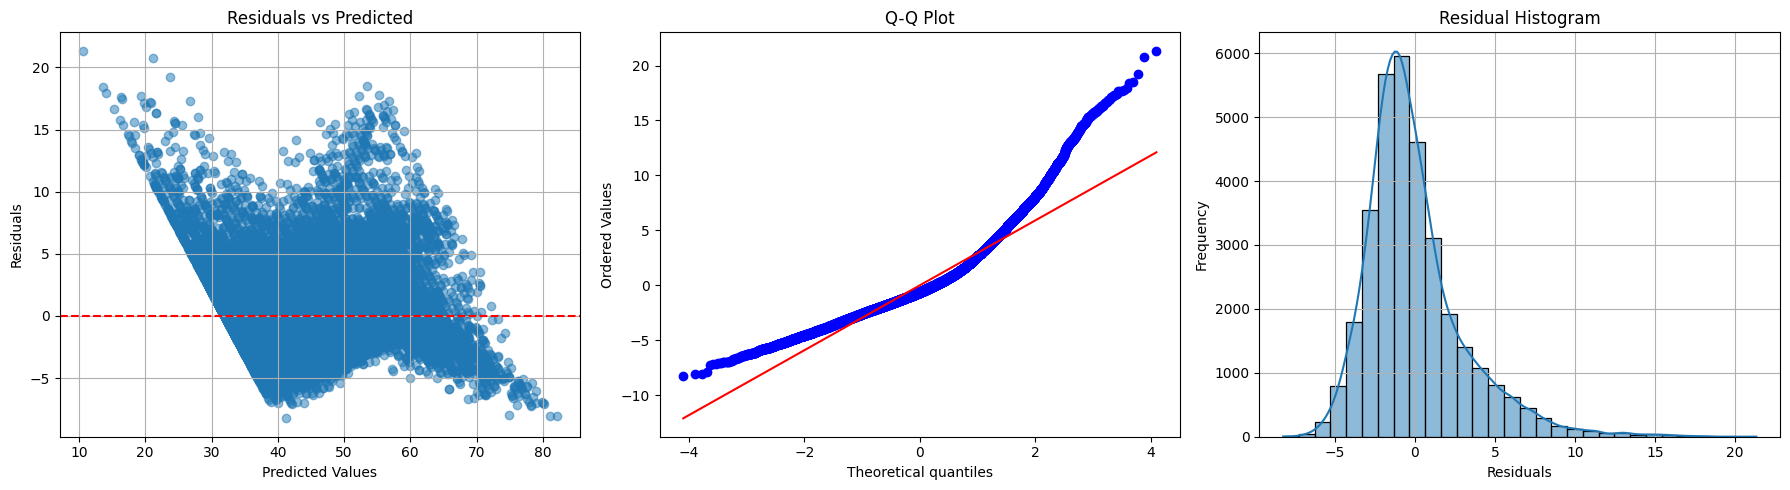

In [66]:
# Create subplots
plt.figure(figsize=(18, 5))

# 1. Residuals vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)

# 2. Q-Q Plot
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")

# 3. Histogram of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.grid(True)

# Layout and display
plt.tight_layout()
plt.show()

[Your inferences here:]

Final graphs depict that this csv dataset best suits Linear Regression model for visualizing. As we can see in 2nd image which clearly shows linear graph.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


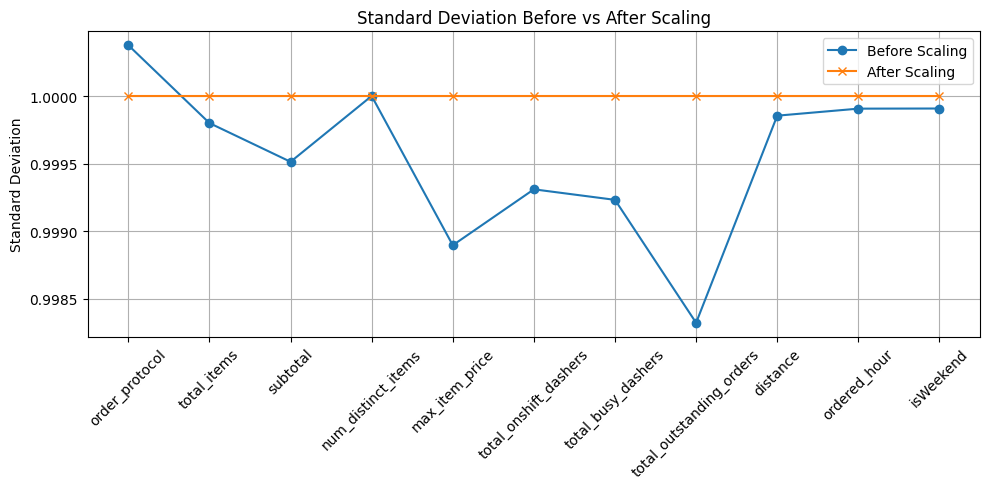

Unscaled Data:
MSE: 9.5510
R2 Score: 0.8728

Scaled Data:
MSE: 9.5510
R2 Score: 0.8728

Coefficient Comparison:
                                           Feature  Unscaled Coefficient  \
total_outstanding_orders  total_outstanding_orders             17.388841   
total_onshift_dashers        total_onshift_dashers            -12.194025   
total_busy_dashers              total_busy_dashers             -4.357575   
distance                                  distance              4.078957   
ordered_hour                          ordered_hour             -2.111111   
subtotal                                  subtotal              1.887094   
order_protocol                      order_protocol             -1.000738   
num_distinct_items              num_distinct_items              0.714666   
isWeekend                                isWeekend              0.670190   
max_item_price                      max_item_price              0.238207   
total_items                            total_items  

In [67]:
# Compare the scaled vs unscaled features used in the final model
# 1. Fit model on unscaled data
unscaled_model = LinearRegression()
unscaled_model.fit(X_train, y_train)
y_pred_unscaled = unscaled_model.predict(X_test)

# 2. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Fit model on scaled data
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)
y_pred_scaled = scaled_model.predict(X_test_scaled)

# 4. Plot standard deviation before and after scaling
std_before = X_train.std()
std_after = pd.DataFrame(X_train_scaled, columns=X_train.columns).std()

plt.figure(figsize=(10, 5))
plt.plot(std_before, marker='o', label='Before Scaling')
plt.plot(std_after, marker='x', label='After Scaling')
plt.xticks(rotation=45)
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation Before vs After Scaling")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Print evaluation metrics
print("Unscaled Data:")
print(f"MSE: {mean_squared_error(y_test, y_pred_unscaled):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_unscaled):.4f}")

print("\nScaled Data:")
print(f"MSE: {mean_squared_error(y_test, y_pred_scaled):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_scaled):.4f}")

# 6. Compare coefficients
unscaled_coef = pd.Series(unscaled_model.coef_, index=X_train.columns)
scaled_coef = pd.Series(scaled_model.coef_, index=X_train.columns)

coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Unscaled Coefficient": unscaled_coef,
    "Scaled Coefficient": scaled_coef
})

print("\nCoefficient Comparison:")
print(coef_df.sort_values(by="Unscaled Coefficient", key=abs, ascending=False))

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [68]:
print(X_train.select_dtypes(include=np.number).columns.tolist())

['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'ordered_hour', 'isWeekend']


In [69]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Use only features that are actually in the dataset
available_features = [col for col in [
    'order_protocol', 'subtotal', 'min_item_price', 'total_onshift_dashers',
    'total_busy_dashers', 'total_outstanding_orders', 'distance',
    'ordered_hour', 'isWeekend'
] if col in dataset.columns]

# Prepare the data
X_final = dataset[available_features]
y = dataset['time_taken_to_deliver']

# Train linear model on unscaled data
model = LinearRegression()
model.fit(X_final, y)

# Analyze the effect of a unit change in a specific feature
feature = 'distance'
if feature in X_final.columns:
    coef = model.coef_[X_final.columns.get_loc(feature)]
    print(f"Effect of a unit change in '{feature}': {coef:.4f} minutes")
else:
    print(f"Feature '{feature}' not found in dataset.")

Effect of a unit change in 'distance': 4.0793 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

>1. market_id – Represents delivery regions. Different markets may have varying traffic, partner availability, or infrastructure, which can impact delivery speed.
>2.  store_primary_category – Categories like fast food vs. grocery influence prep time. Fast food stores tend to dispatch quickly, while others may take longer due to stock or prep time.
>3. order_protocol – Indicates order/payment method. Some protocols may delay processing (e.g., third-party systems), affecting overall delivery time.
>4. created_at_dayofweek / isWeekend – Orders placed on weekends or certain days tend to experience longer delivery times due to high order volume and limited delivery capacity.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> It means that 20% of the dataset is allocated for the test set, and the remaining 80% is used for training the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>'distance' represents how far the delivery needs to travel.Greater distance typically results in longer delivery time, making it the most strongly correlated numerical feature.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Approach to Detect Outliers:
Used the Z-score method from the scipy.stats module.
Calculated Z-scores for all numerical columns in the dataset.
An observation was considered an outlier if its Z-score was greater than 3 or less than -3, which indicates it’s more than 3 standard deviations from the mean.

>How Outliers Were Addressed:
Rows containing outliers (Z-score > 3 or < -3 in any numeric feature) were filtered out.
This helped in improving model performance by removing extreme values that could skew the results or introduce bias.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>From the final linear regression model, the top 3 features significantly affecting time_taken_to_deliver were:
>
>1.'total_outstanding_orders'→ Higher outstanding orders indicate delivery backlog, which increases delivery time.
>
>2'total_onshift_dashers'→ More dashers available reduces delivery time due to better resource availability.
>
>3.'distance'→ Longer distances directly increase the delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> 1) Linear Regression's goal is to find the single straight line that best captures trend.

> 2) This line isn't just for looking at. It becomes a predictive     model. Once you have the "best-fit line," you can use it to estimate the target_column that wasn't in your original data. You just find its size on the x-axis, go up to the line, and see what the corresponding price is on the y-axis.

> 3) Linear Regression has two different types i.e Simple Linear Regression and Multiple Linear Regression

> 4) Equation: y = β₀ + β₁x

  y: The target variable you are trying to predict (e.g., House Price). This is the dependent variable.
  x: The input feature you are using to predict (e.g., House Size). This is the independent variable.

  β₁: The coefficient or slope. It represents the change in y for a one-unit change in x.
  β₀: The intercept or bias. It's the value of y when x is 0.

> 5) Equation: y = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + ... + βₙxₙ

  y: Still the target variable (e.g., House Price).
  x₁, x₂, x₃...: The different input features (e.g., x₁=size, x₂=number of bedrooms, x₃=age of the house).

  β₁, β₂, β₃...: The coefficient for each feature. β₂ represents the change in y for a one-unit change in x₂, assuming all other features are held constant.
  β₀: Still the intercept, the base value when all features are 0.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> 1) Simple Linear Regression (SLR) Models the relationship between two variables whereas Multiple Linear Regression (MLR) Models the relationship between multiple variables.

> 2) SLR has one independent variable (x) whereas MLR has Two or more independent variables (x₁, x₂, ...).

> 3) SLR Equation :  y = β₀ + β₁x
     MLR Equation : y = β₀ + β₁x₁ + β₂x₂ + ...

> 4) SLR : Good for understanding the isolated impact of one variable. Often too simplistic for accurate real-world predictions.
MLR : Much more common and powerful for real-world predictive modeling, as outcomes rarely depend on a single factor.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> 1) The cost function (also called a loss function or objective function) is a formula that measures the total error of the model. It quantifies how poorly the model is performing by calculating a single number—the "cost" or "loss."

> 2) In essence, its role is to act as a scorekeeper for the model.
A high cost means the model's predictions are far from the actual data (the line is a poor fit).
A low cost means the model's predictions are close to the actual data (the line is a good fit).

> 3) The ultimate goal of training a Linear Regression model is to find the line (i.e., the coefficients β₀ and β₁) that results in the lowest possible cost.

> 4) FORMULAE : Cost(β₀, β₁) = (1/n) * Σ (y_actual - y_predicted)²

> 5) There are two primary methods to achieve cost minimization.

**Method 1:** Ordinary Least Squares (OLS) - The Direct, Analytical

OLS is a mathematical method that uses linear algebra and calculus. It finds the derivative of the cost function with respect to each coefficient (β₀, β₁) and sets these derivatives to zero. By solving this system of equations, it computes the exact values for β₀ and β₁ that guarantee the minimum possible error.

 **Method 2:** Gradient Descent - The Iterative, Step-by-Step Approach

Initialize: Start with random values for the coefficients β₀ and β₁. (Place the hiker randomly on the mountainside).

Calculate Gradient: Compute the gradient (the partial derivative) of the cost function at the current position. The gradient tells you the direction of the steepest ascent.

Update Coefficients: Update the coefficients by taking a small step in the opposite direction of the gradient. The size of this step is controlled by a parameter called the Learning Rate (α).
new_β = old_β - (learning_rate * gradient)

Repeat: Go back to step 2 and repeat the process for a set number of iterations or until the cost stops decreasing significantly.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> **Underfitting** : An underfitting model is too simple. It has not learned the underlying structure of the data. It fails to capture the relationship between the input and output variables.

> **Overfitting** : An overfitting model is too complex. It has learned the training data so perfectly that it has memorized not only the underlying patterns but also the noise and random fluctuations in the data. It fails to generalize to new, unseen data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

**Residuals** :
> A residual is simply the error for a single data point. It's the difference between the actual value and the predicted value from your model.

> Residual = Actual Y - Predicted Y

> A positive residual means the model's prediction was too low.
A negative residual means the model's prediction was too high.
A residual of zero means the model's prediction was perfect.

**Residual plots** :       
> A residual plot is a scatter plot where:
The x-axis shows the predicted (or "fitted") values from your model (ŷ).
The y-axis shows the residuals (Actual Y - Predicted Y).

**Diagnosing a linear regression model** :       

A residual plot is a key diagnostic tool for a linear regression model. It plots the model's errors (residuals) against its predicted values. An ideal plot shows a random scatter of points around the zero line, confirming the model's assumptions are met. Systematic patterns reveal problems: a curve indicates a non-linear relationship, a fan shape points to non-constant error variance , and isolated points highlight potential outliers. This visual check is essential for verifying the model's reliability.